<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [84]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    sum = 0
    for i in range(len(X)):
        sum += X[i].dot(V[i])
    return sum


def tests(): 
    assert (
        sum_prod( [ np.matrix('[1,2,3; 4,5,6; 7,8,9]'),
            np.matrix('[9,8,7; 6,5,4; 3,2,1]') ],
            [ np.array([ [3], [2], [1] ]),
            np.array([ [1], [2], [3] ]) ])  == np.array([ [56], [56], [56] ])).all()


tests()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [115]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)


def tests(): 
    assert ( binarize(np.matrix('0.49,0.5,0.51')) 
            == np.matrix('0,0,1') ).all()
    assert ( binarize(np.matrix('0.49; 0.5; 0.51')) 
            == np.matrix('0;0;1') ).all()
    assert ( binarize(np.matrix('[-1,0,-1; 0,1,0; -1,0,-1]')) 
            == np.matrix('0,0,0; 0,1,0; 0,0,0') ).all()
    assert ( binarize(np.matrix('[1,2,3,4; 5,-6,-7,8; 9,-10,-11,12; 13,14,15,16]'))  
            == np.matrix('1,1,1,1; 1,0,0,1; 1,0,0,1; 1,1,1,1') ).all()

tests()    

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [191]:
def unique_rows(mat):
    m = np.ravel(mat, order='C')
    count = len(m)
    step = count//len(mat)
    result = []
    for i in range(0,count,step):
        result += set(m[i:i+step])
    return result
    
def unique_columns(mat):
    m = np.ravel(mat)
    step = len(m)//len(mat)
    result = []
    for i in range(step):
        result += set(m[i::step])
    return result

assert unique_rows(np.matrix('1,1,2; 1,1,3')) == [1, 2, 1, 3]
assert unique_columns(np.matrix('1,2,3; 1,2,1')) == [1, 2, 1, 3]

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

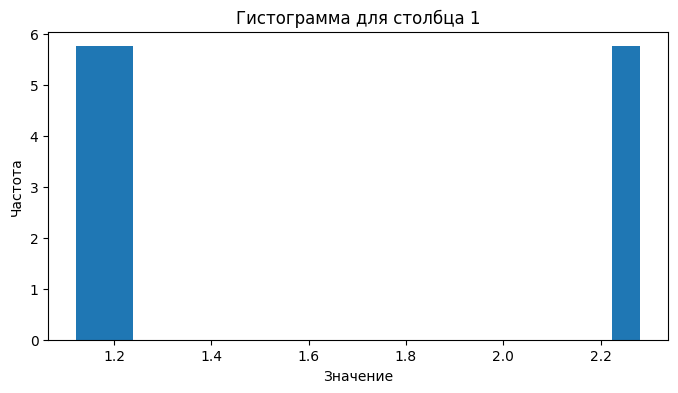

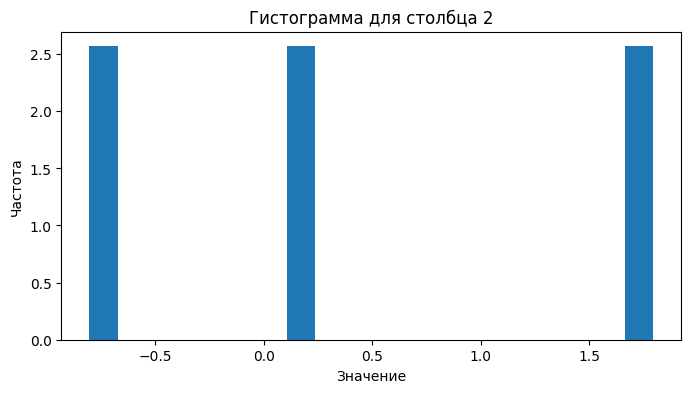

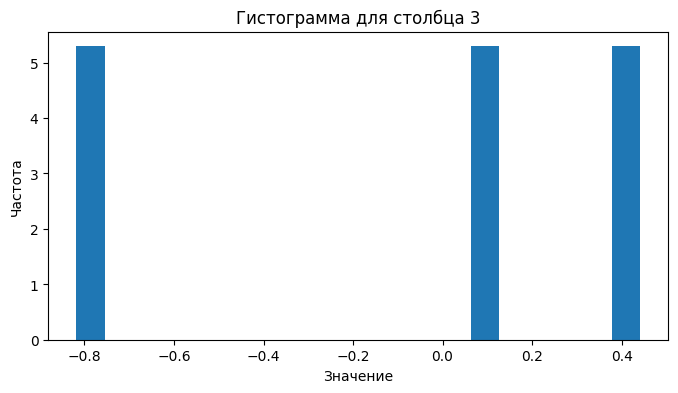

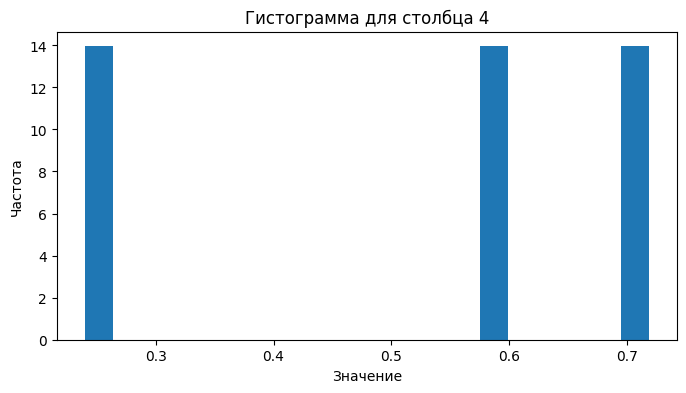

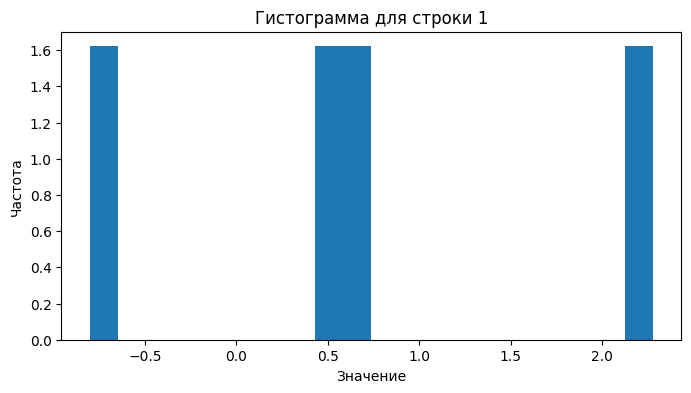

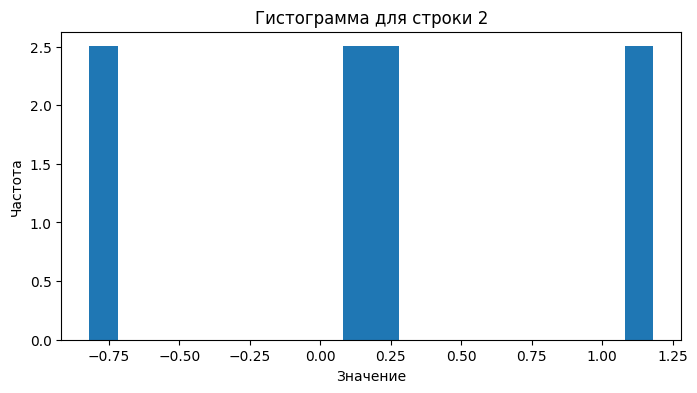

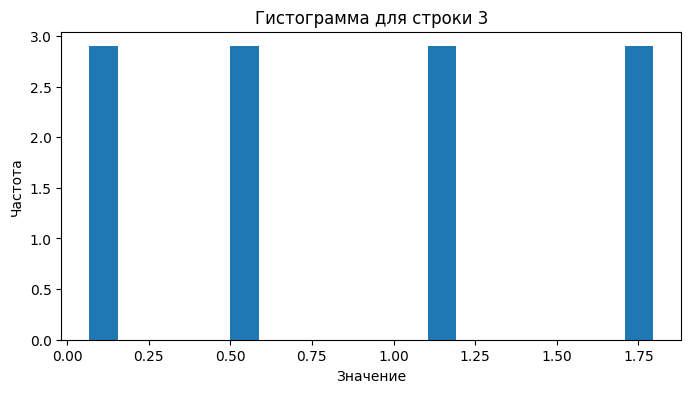

(array([ 1.52802934,  0.38529136, -0.10282445,  0.51122664]),
 array([0.28404523, 1.14980849, 0.27902592, 0.04012709]),
 array([0.65914527, 0.19183891, 0.890308  ]),
 array([1.20532393, 0.50031389, 0.41163072]))

In [87]:
def generate_and_analyze_matrix(rows, cols):
    
    matrix = np.random.normal(0, 1, (rows, cols))
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)    
    row_variances = np.var(matrix, axis=1)
    
    for i in range(cols):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[:, i], bins=20, density=True)
        plt.title(f'Гистограмма для столбца {i + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.show()
    
    for i in range(rows):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[i, :], bins=20, density=True)
        plt.title(f'Гистограмма для строки {i + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.show()
    
    return col_means, col_variances, row_means, row_variances


generate_and_analyze_matrix(3, 4)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [246]:
def chess(m, n, a, b):
    mat = np.full((m,n),b)
    for y in range(m):
        for x in range(n):
            if x % 2 == 0 and y % 2 == 0 \
               or x % 2 != 0 and y % 2 != 0:
                mat[y][x] = a       
    return mat

def tests():
    assert (chess(4,1,0,5) == np.matrix('0;5;0;5')).all()
    assert (chess(4,2,0,5) == np.matrix('0,5; 5,0; 0,5; 5,0')).all()
    assert (chess(4,3,0,5) == np.matrix('0,5,0; 5,0,5; 0,5,0; 5,0,5')).all()
    assert (chess(4,4,0,5) == np.matrix('0,5,0,5; 5,0,5,0; 0,5,0,5; 5,0,5,0')).all()

tests()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

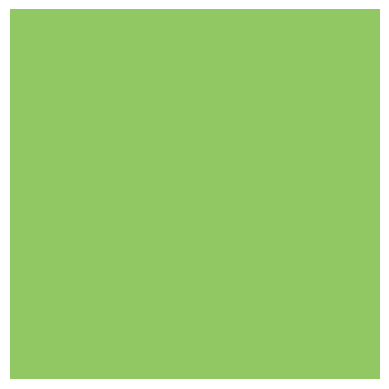

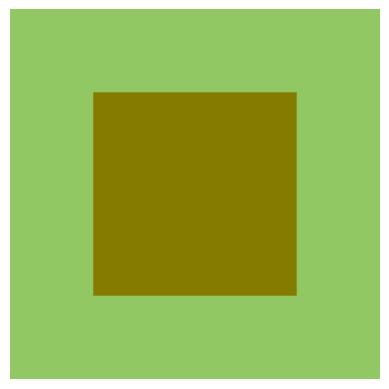

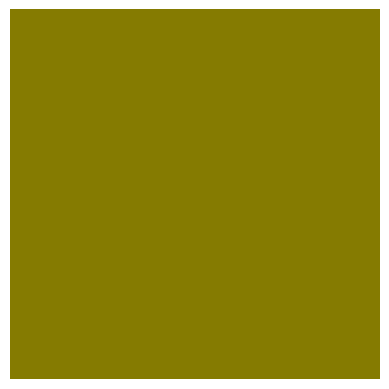

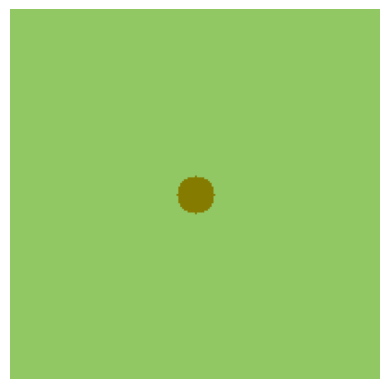

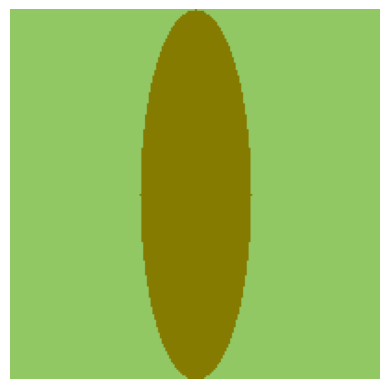

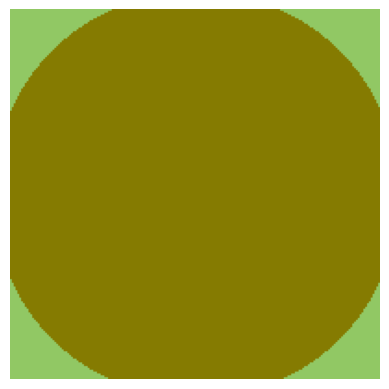

In [84]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3)) * background_color
    
    top_left_x = (m - a) // 2
    top_left_y = (n - b) // 2  
    image[top_left_y:top_left_y+b, top_left_x:top_left_x+a] = rectangle_color
    
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plt.show()

draw_rectangle(0, 0, 200, 200, (133, 123, 1), (145, 200, 100))
draw_rectangle(110, 110, 200, 200, (133, 123, 1), (145, 200, 100))
draw_rectangle(200, 200, 200, 200, (133, 123, 1), (145, 200, 100))

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3)) * np.array(background_color)
    
    center_x = m // 2
    center_y = n // 2
    x, y = np.ogrid[-center_x:m-center_x, -center_y:n-center_y]
    
    mask = (x**2/a**2 + y**2/b**2) <= 1
    image[mask] = ellipse_color
    
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plt.show()

draw_ellipse(10, 10, 200, 200, (133, 123, 1), (145, 200, 100))
draw_ellipse(100, 30, 200, 200, (133, 123, 1), (145, 200, 100))
draw_ellipse(110, 110, 200, 200, (133, 123, 1), (145, 200, 100))


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [349]:
def analyze_time_series(time_series, p):
    result = {}
    result["mean"] = np.mean(time_series)
    result["variance"] = np.var(time_series)
    result["std_deviation"] = np.sqrt(result["variance"])

    local_min = []
    local_max = []

    for i in range(1, len(time_series) - 1):
        if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_min.append((i, time_series[i]))
            
        elif time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_max.append((i, time_series[i]))
            
    result["local_minimum"] = local_min
    result["local_maximum"] = local_max

    window = np.ones(p) / p
    result["moving_average"] = np.convolve(time_series, np.ones(p) / p, mode='valid')

    return result

time_series = [2, 3, 1, 5, 4, 7, 6, 8, 9, 4]
print(analyze_time_series(time_series, 5))

{'mean': 4.9, 'variance': 6.090000000000001, 'std_deviation': 2.4677925358506134, 'local_minimum': [(2, 1), (4, 4), (6, 6)], 'local_maximum': [(1, 3), (3, 5), (5, 7), (8, 9)], 'moving_average': array([3. , 4. , 4.6, 6. , 6.8, 6.8])}


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [324]:
def f(vec):
    index_max = vec.max()+1
    length = len(vec)
    m = np.full((length,index_max), 0)
    m[np.arange(length), vec] = 1
    return m

f(np.array([0,2,3,0]))    

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])